## Project Title: Bank Marketing Classification Project

The objective of this teamwork is to implement a step-by-step classification analysis using Python's machine learning, data analysis, manipulation, and visualization libraries such as Scikit-Learn, Pandas, NumPy, and Matplotlib.

The entire project has been divided into three steps, which include data preprocessing and visualization, training the ML model, and model tuning and validation. The project must be completed by its deadline and submitted separately by each member of the groups to the corresponding assignment on our Itslearning platform.

The team size is 3-5 members.

The evaluation of the teamwork will occur by presenting the analysis and results in the presence of the instructor. Please use the provided Jupyter Notebook to document the aims of your project, describe the dataset, document your data analysis process, and evaluate the results. Make the analysis self-descriptive by adding Markdown comments and using descriptive variable names.

The efforts of individual team members will also be evaluated in the process.



### **Project Description:**      

In this machine learning project, students will tackle a classification task that has real-world applications in marketing and financial institutions. The project focuses on predicting whether a client will subscribe to a term deposit in a bank, based on a set of features obtained through marketing campaigns. This project offers a hands-on opportunity to apply various data preprocessing techniques, build and evaluate classification models, and make informed decisions based on the results.

### **Project Goal:**

The primary goal of this project is to develop an accurate classification model that can assist the bank's marketing team in identifying potential clients who are more likely to subscribe to term deposits. By achieving this goal, the bank can optimize its marketing efforts, reduce costs, and improve the overall efficiency of its campaigns.

### **Potential Real-World Applications:**

Understanding the outcome of this classification task has several practical applications:

**1. Marketing Strategy Optimization:** The bank can use the predictive model to prioritize potential clients who are more likely to subscribe. This allows them to tailor marketing strategies and allocate resources more effectively, leading to higher conversion rates and reduced marketing expenses.

**2. Resource Allocation:** The model's predictions can help the bank allocate resources, such as marketing personnel and budget, to regions or customer segments that are more likely to yield positive results.

**3. Customer Relationship Management:** By identifying potential subscribers, the bank can personalize communication and services to meet the specific needs and preferences of clients, enhancing customer satisfaction and loyalty.

**4. Risk Assessment:** The model can assist in assessing the risk associated with marketing campaigns. By identifying clients less likely to subscribe, the bank can avoid aggressive marketing approaches that could lead to negative customer experiences.

### **Project Significance:**

This project mirrors real-world challenges faced by marketing teams in financial institutions. By successfully completing this project, students will not only gain technical skills in machine learning but also learn how to apply their knowledge to solve practical business problems. They will understand the importance of data-driven decision-making and how classification models can have a significant impact on marketing and resource allocation strategies.

### **Project Outcome:**

At the end of this project, students will have developed and evaluated a classification model capable of predicting term deposit subscriptions. They will be able to justify their model selection and discuss its potential applications in marketing and financial institutions.

Through this project, students will develop critical skills that are highly relevant in the data science and machine learning industry, as well as a deep understanding of the broader implications of their work.


### **Deadlines of submissions:**

Thursday 24 April 2025 at 09.00



### Project Submission and Presentation:

Please book a time for an evaluation event on Friday, April 25, 2025, as soon as the time slots are published. Note: The 15-minute time slots will be made available later on Itslearning. The groups will present their work during this evaluation event.



#### Note:  Please do not change the lines related to the grades in the code cells.

In [126]:
## Enter your group name and your full names ##
group_name = 'P21 + P22 => Purple Group 15'
members = 'Aalo Kaari, Alicja Mackowska, Le Thinh, Seo Jeehun'
grade = 0

### **Step 1: Data Visualization and Preprocessing** (8 points)

**Data Loading**: ** Start by loading the Bank Marketing Dataset (UCI) into your preferred data analysis environment (e.g., Python with libraries like Pandas and Matplotlib). (1 point)

**Data Exploration:** Perform initial exploratory data analysis (EDA) to understand the dataset's structure, summary statistics, and data types. (1 point)

**Data Splitting**: ** Split the preprocessed data into training and testing sets (e.g., 80% for training and 20% for testing). (1 point)

**Handling Missing Values:** Identify and handle missing values appropriately (e.g., impute missing values or drop rows/columns with missing data). (1 point)

**Encoding Categorical Features:** Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding. (1 point)

**Data Scaling:** Normalize/standardize numerical features to ensure they have the same scale. (1 point)

**Data Visualization:** Create visualizations (e.g., histograms, box plots, and correlation matrices) to gain insights into the data distribution and relationships between features. (2 points)

In [70]:
# Import required libraries 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

In [71]:
print("Current working directory:", os.getcwd())

Current working directory: /home/iit0/Documents/Koulu/data analytics & machine learning/finalproject


In [72]:
# Create an absolute path from the current working directory
base_path = os.getcwd()  
file_path = os.path.join(base_path, 'Final Project DataSet', 'bank-additional-full.csv')

# Load the dataset
bank = pd.read_csv(file_path, sep=';')

## Data exploration and visualization

In [73]:
# 1. Display the first few rows
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [74]:
# 2. Get data type information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [75]:
# 3. Get summary statistics
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


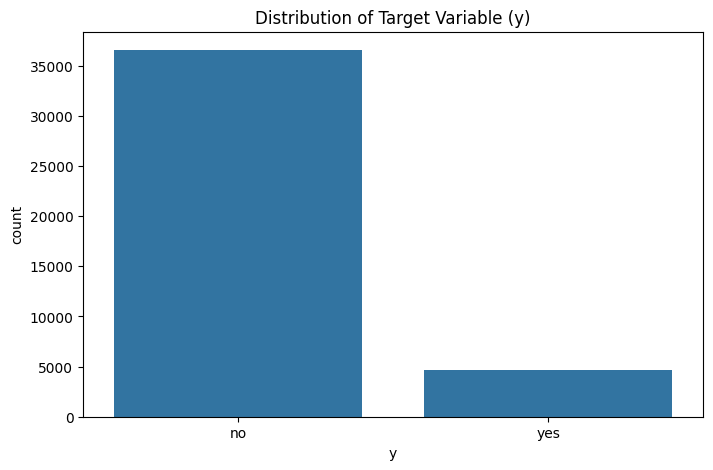

In [76]:
# 4. Visualize target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='y', data=bank)
plt.title('Distribution of Target Variable (y)')
plt.show()

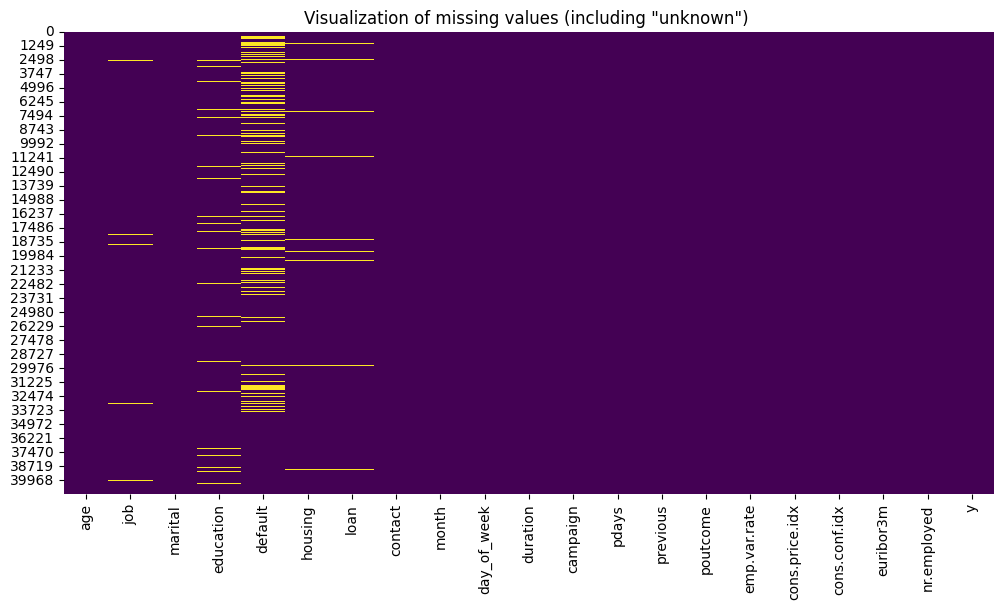

In [77]:
# 5. Visualize missing values (including 'unknown')
missing_data = bank.replace('unknown', np.nan).isna()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, cbar=False, cmap='viridis')
plt.title('Visualization of missing values (including "unknown") ')
plt.show()

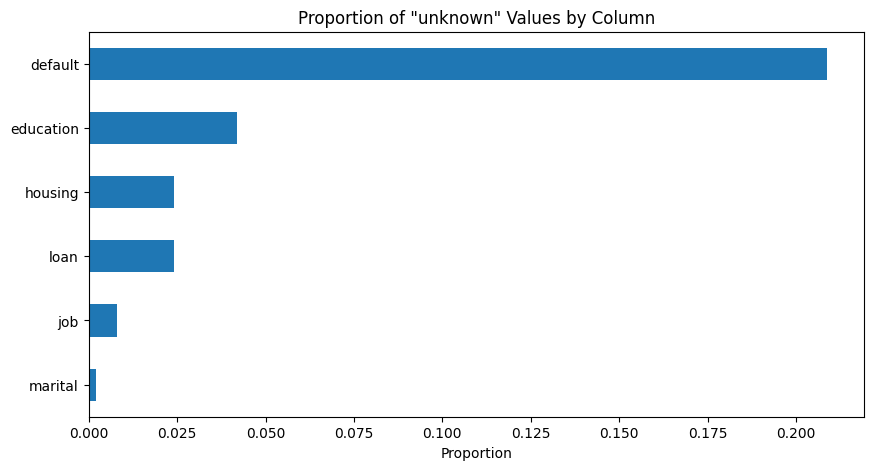

In [78]:
# Handle missing values 
# 6. Calculate and visualize 'unknown' values ratio
unknown_ratios = {}
for col in bank.columns:
    if bank[col].dtype == 'object':
        unknown_ratio = (bank[col] == 'unknown').mean()
        if unknown_ratio > 0:
            unknown_ratios[col] = unknown_ratio
            
plt.figure(figsize=(10, 5))
pd.Series(unknown_ratios).sort_values().plot(kind='barh')
plt.title('Proportion of "unknown" Values by Column')
plt.xlabel('Proportion')
plt.show()

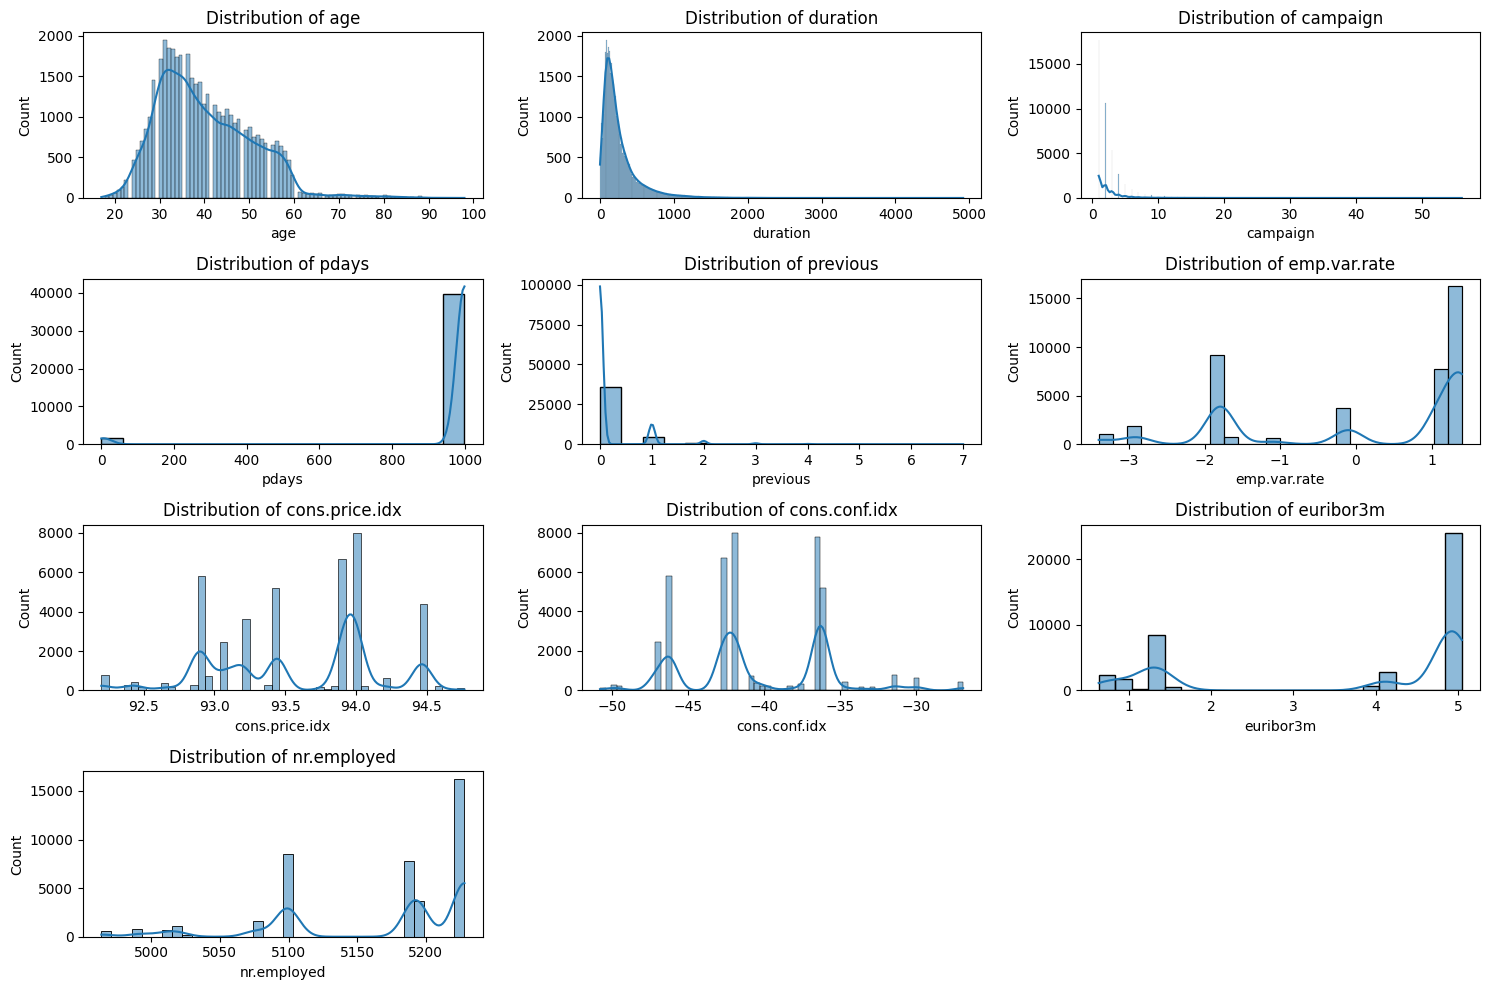

In [79]:
# 7. Visualize numerical feature distributions

# Numerical features
numeric_cols = [
    'age',               
    'duration',          
    'campaign',          
    'pdays',             
    'previous',          
    'emp.var.rate',      
    'cons.price.idx',    
    'cons.conf.idx',     
    'euribor3m',         
    'nr.employed'        
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(bank[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Percentage contacted before: 3.7%
count    1515.000000
mean        6.014521
std         3.824906
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
90%        12.000000
95%        14.000000
max        27.000000
Name: pdays, dtype: float64


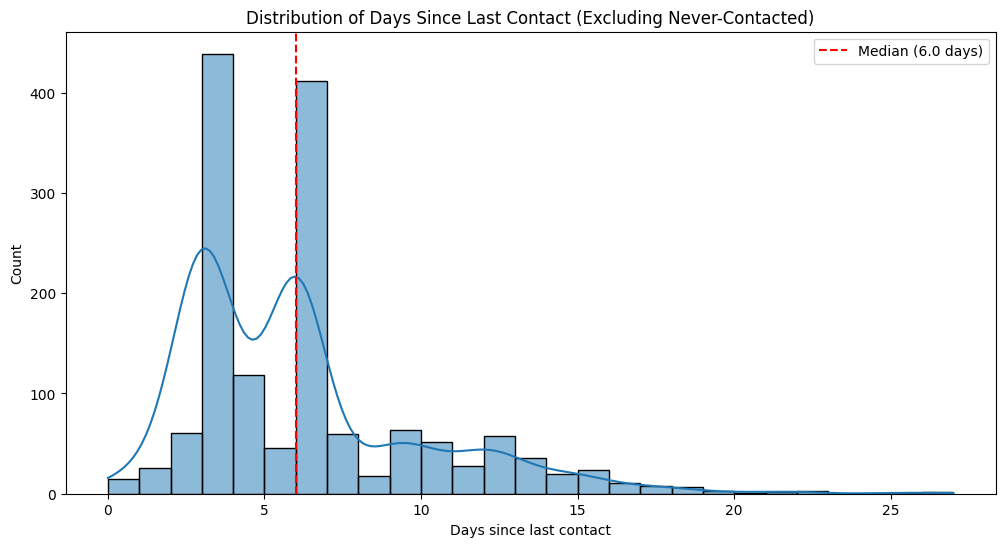

In [80]:
# Visualizing pdays without never contacted(999) values

# Copying the features
contacted_X= bank.drop('y', axis=1)
# Filter only contacted clients (non-999)
contacted = contacted_X[contacted_X['pdays'] != 999].copy()
# print info
print(f"Percentage contacted before: {len(contacted)/len(contacted_X):.1%}")
print(contacted['pdays'].describe(percentiles=[.25, .5, .75, .9, .95]))

# Histogram with density
plt.figure(figsize=(12, 6))
sns.histplot(contacted['pdays'], bins=contacted['pdays'].max(), kde=True)
plt.title('Distribution of Days Since Last Contact (Excluding Never-Contacted)')
plt.xlabel('Days since last contact')
plt.axvline(contacted['pdays'].median(), color='red', linestyle='--', label=f'Median ({contacted['pdays'].median()} days)')
plt.legend()
plt.show()

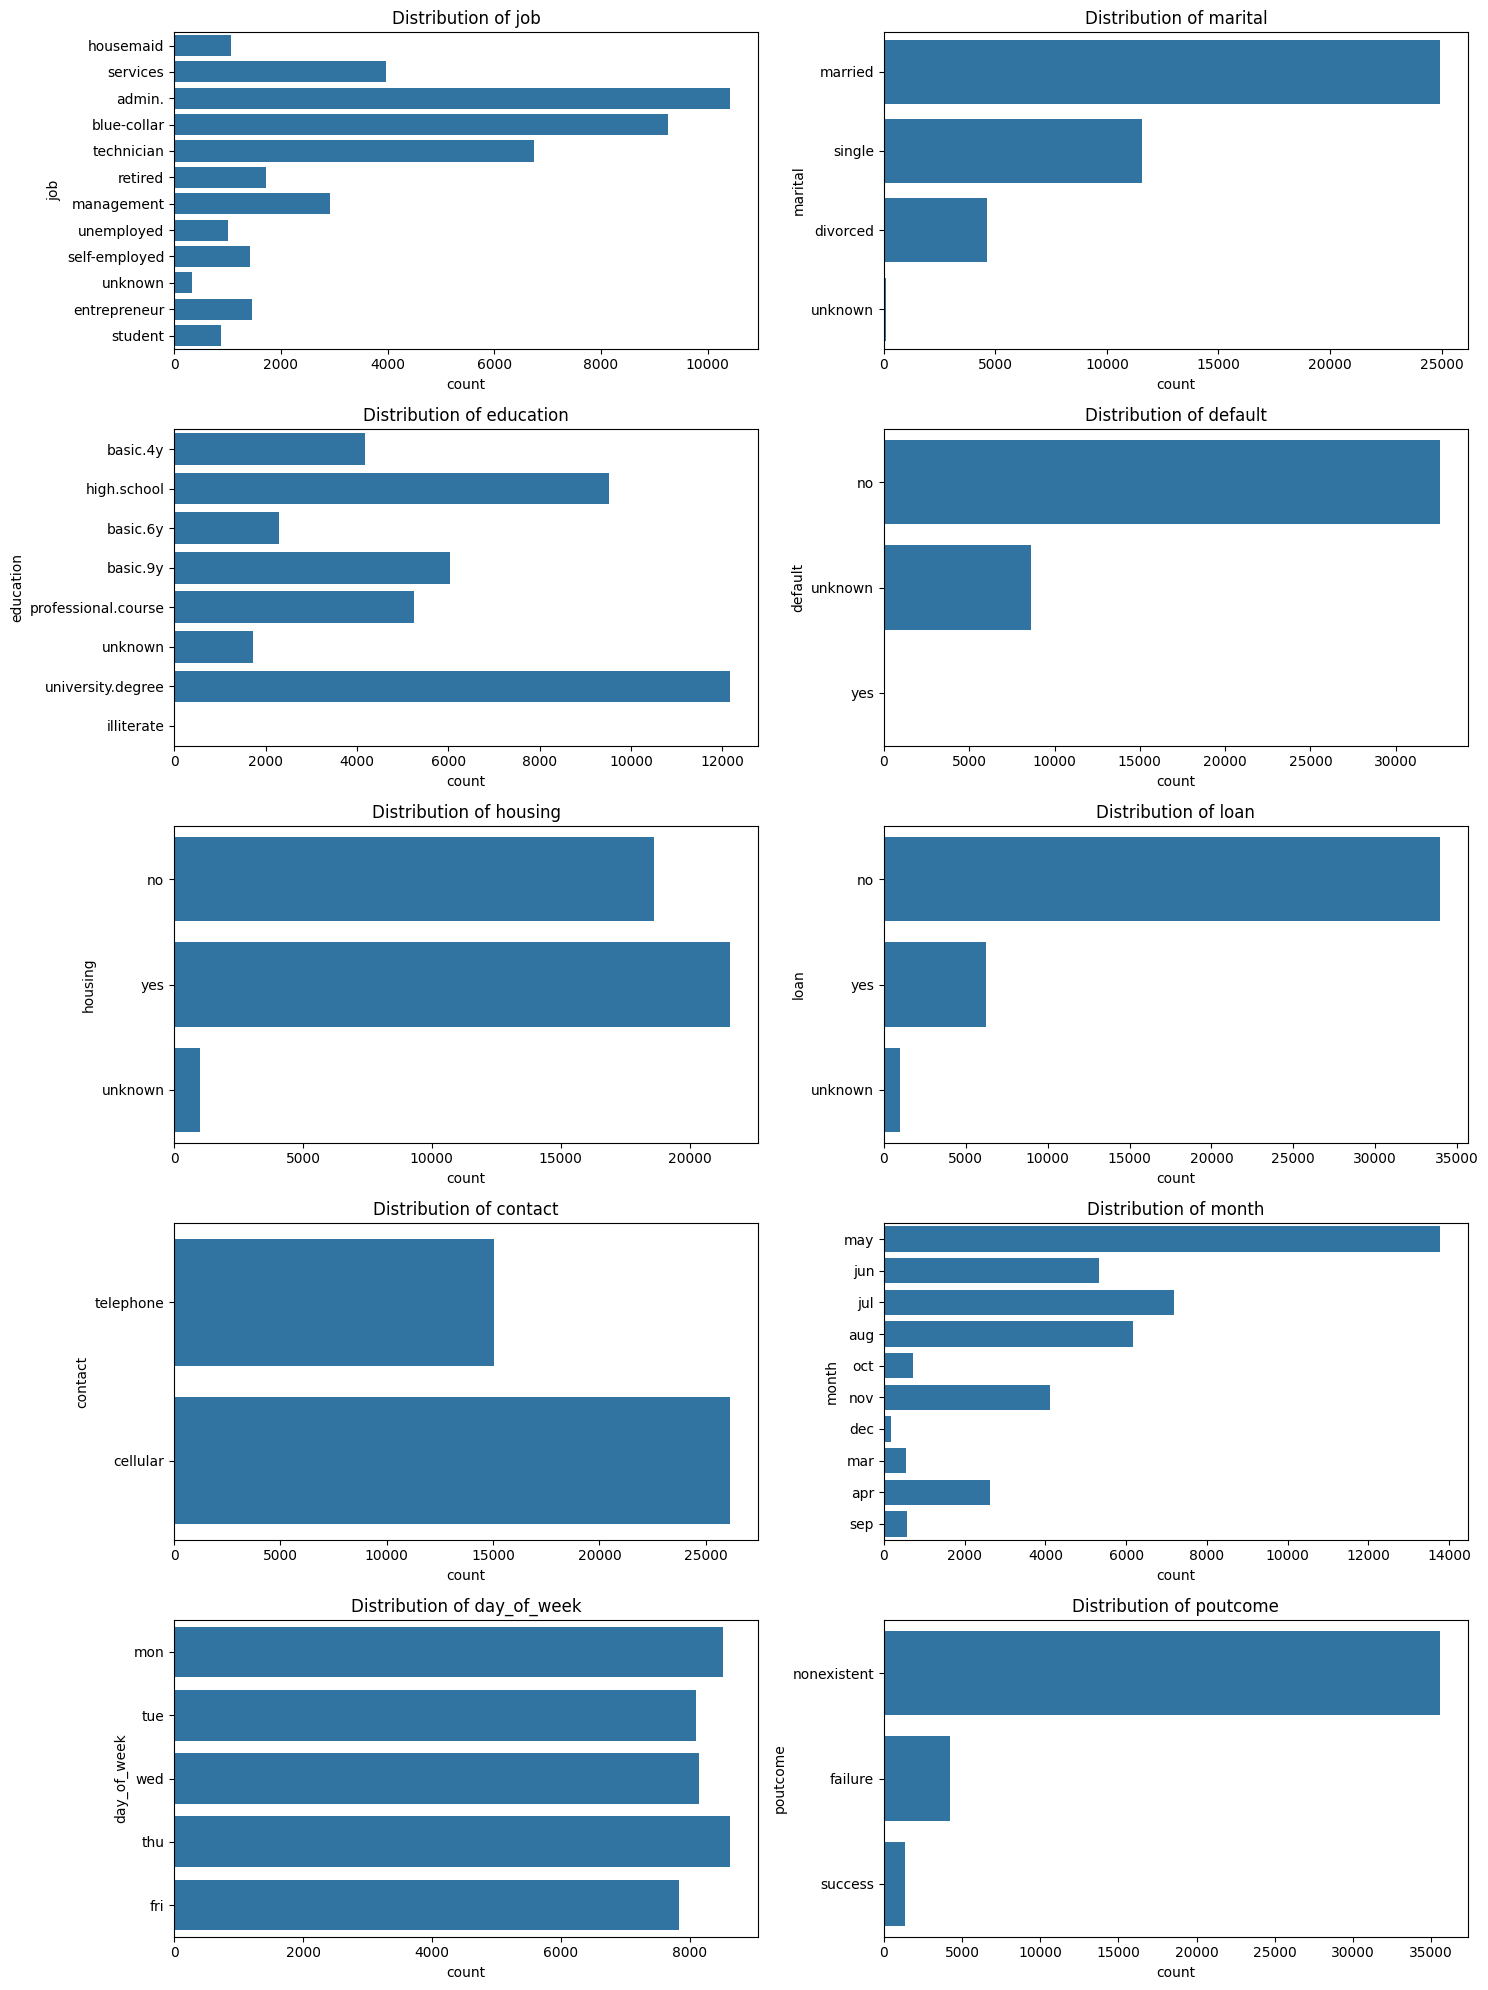

In [81]:
# 8. Visualize categorical feature distributions

# Categorical features
categorical_cols = [
    'job',             
    'marital',        
    'education',        
    'default',          
    'housing',         
    'loan',            
    'contact',         
    'month',            
    'day_of_week',      
    'poutcome'          
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(5, 2, i)
    sns.countplot(y=col, data=bank)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()




In [82]:
# checking the correlations for numerical columns
test = bank.copy()
# mapping the Y column to numerical values
test['y'] = test['y'].map({'yes': 1, 'no': 0})
corr_matrix = test.corr(numeric_only=True)
corr_matrix["y"].sort_values(ascending=False)

y                 1.000000
duration          0.405274
previous          0.230181
cons.conf.idx     0.054878
age               0.030399
campaign         -0.066357
cons.price.idx   -0.136211
emp.var.rate     -0.298334
euribor3m        -0.307771
pdays            -0.324914
nr.employed      -0.354678
Name: y, dtype: float64

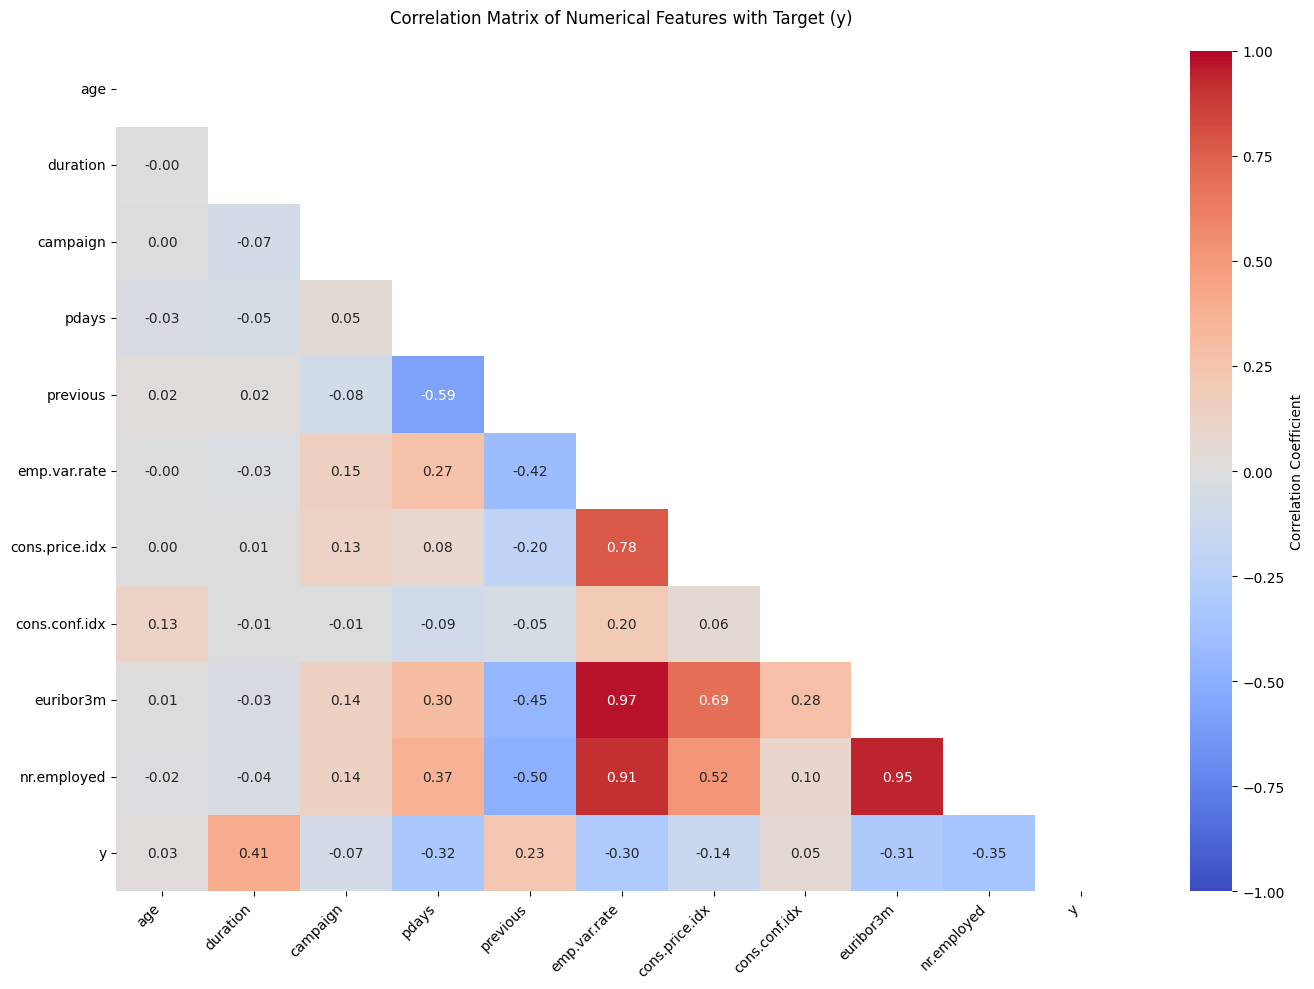

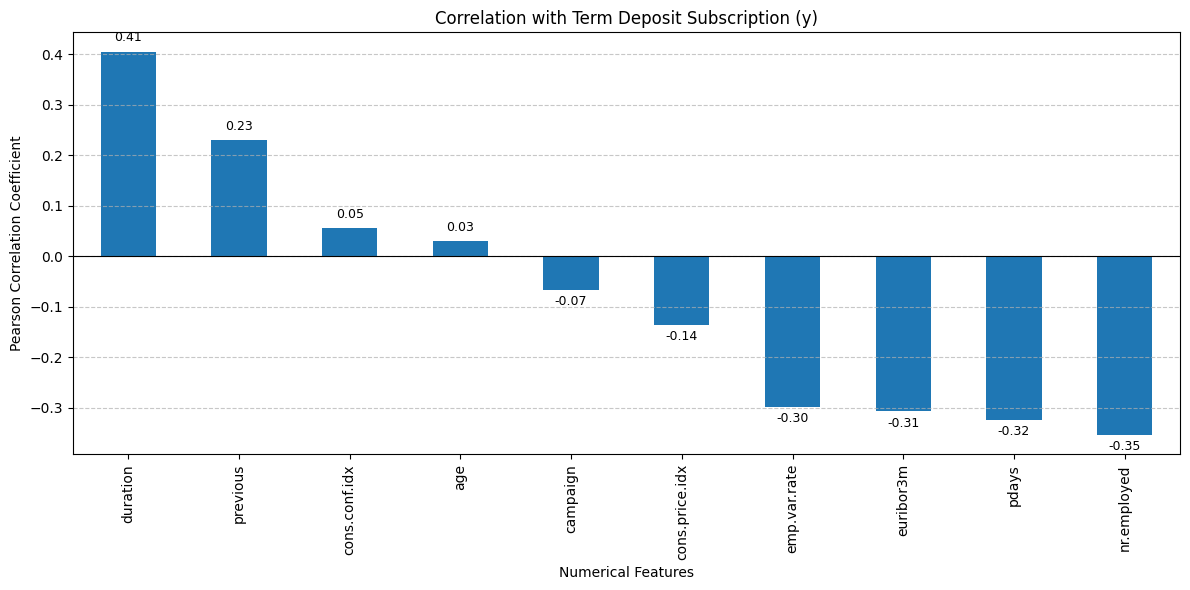

In [83]:
# Sort correlations with target
target_corr = corr_matrix['y'].sort_values(ascending=False)

# Create the visualization
plt.figure(figsize=(14, 10))

# Heatmap of correlation matrix
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm',
            center=0,
            vmin=-1, 
            vmax=1,
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)),
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title("Correlation Matrix of Numerical Features with Target (y)", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Bar plot of target correlations
plt.figure(figsize=(12, 6))
target_corr.drop('y').plot.bar()
plt.axhline(0, color='black', linewidth=0.8)
plt.title("Correlation with Term Deposit Subscription (y)")
plt.ylabel("Pearson Correlation Coefficient")
plt.xlabel("Numerical Features")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, v in enumerate(target_corr.drop('y')):
    plt.text(i, v + 0.02 if v > 0 else v - 0.03, 
             f"{v:.2f}", 
             ha='center', 
             color='black',
             fontsize=9)

plt.tight_layout()
plt.show()

# Data exploration findings
The dataset consists of 41,188 rows and 21 columns, with no missing values.

However, several categorical variables contain the value "unknown", which should be treated as missing data during preprocessing.

Also the numerical column "pdays" contains basically only the value 999, which means not contacted. We need to handle that

Among all features, 10 are numerical and 10 are categorical, indicating the need for appropriate encoding and scaling prior to model training.

The target variable y is currently a string ("yes"/"no") and must be converted into binary form (1/0) for classification.

We observed a significant class imbalance in the target variable `y`, where only ~11% of the clients subscribed to a term deposit. So we need to preserve this using startified splitting.

We also decided to remove the duration column as the dataset authors suggest.

## The note from the dataset authors:

The duration attribute highly affects the output target (e.g., if duration=0 then y="no").

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. 

Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## Data preprocessing

In [84]:
# dropping duration column for better prediction outcomes
bank = bank.drop('duration', axis=1)

# Separating into features and target
X = bank.drop('y', axis=1)
# Convertting target variable to numeric
y = bank['y'].map({'yes': 1, 'no': 0})


# Stratified split to maintain class ratio
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print("Stratified split completed.")
print("Training target distribution:\n", y_train.value_counts(normalize=True))
print("Training target :\n", y_train.value_counts())
print("Testing target :\n", y_test.value_counts())
print("Testing target distribution:\n", y_test.value_counts(normalize=True))


Stratified split completed.
Training target distribution:
 y
0    0.887344
1    0.112656
Name: proportion, dtype: float64
Training target :
 y
0    29238
1     3712
Name: count, dtype: int64
Testing target :
 y
0    7310
1     928
Name: count, dtype: int64
Testing target distribution:
 y
0    0.887351
1    0.112649
Name: proportion, dtype: float64


In [85]:
# Re defining the columns for different pipelines

# Split Categorical Features by Encoding Type

# Ordinal/Binary (low cardinality with natural order)
# These are categorical features with binary responses or clear ordinal relationships
ordinal_cats = [
    'default',          # Has credit in default? (no/yes/unknown)
    'housing',          # Has housing loan? (no/yes/unknown)
    'loan',             # Has personal loan? (no/yes/unknown)
    'contact',          # Contact communication type (cellular/telephone)
    'poutcome'          # Outcome of previous campaign (failure/nonexistent/success)
]

# OneHot (higher cardinality or no natural order)
# These are categorical features with multiple categories and no inherent ordering
onehot_cats = [
    'job',              # Type of job (12 categories like admin, blue-collar, etc.)
    'marital',          # Marital status (divorced/married/single/unknown)
    'education',        # Education level (8 categories from basic to university)
    'month',            # Last contact month (jan-dec)
    'day_of_week'       # Last contact day of week (mon-fri)
]


# Numeric Features
# Standard numerical features that can be scaled directly
numeric_cols = [
    'age',              # Client's age in years
    'campaign',         # Number of contacts during this campaign
    'previous',         # Number of contacts before this campaign
    'emp.var.rate',     # Employment variation rate (quarterly indicator)
    'cons.price.idx',   # Consumer price index (monthly indicator)
    'cons.conf.idx',    # Consumer confidence index (monthly indicator)
    'euribor3m',        # Euribor 3 month rate (daily indicator)
    'nr.employed'       # Number of employees (quarterly indicator)
]

# Special Numeric Features
# Requires special handling due to specific meaning of values
special_numeric_cols = [
    'pdays'             # Days since last contact (999 means not previously contacted)
]
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [87]:
# Pipeline and custom function to handle the pdays colum

# Bins the values into 5 categories, which were created using the data visualization above

# Binning is done because 97% of the data has the value 999, which means never contacted. If those were replaced with NaN it would skew the data greatly

def pdays_create_bins(df):
    df = df.copy()
    
    # define bins and labels
    bins = [0, 4, 8, 13, 27, np.inf]
    labels = ['0-4d (very recent)', '5-8d (recent)', '9-13d (mid)', '14-27d (old)', 'never_contacted']
    
    # separate into bins
    pdays_bin = pd.cut(
        df['pdays'],
        bins=bins,
        labels=labels,
        include_lowest=True
    ).astype('category')
    
    # Assign values
    df['pdays'] = pdays_bin
    
    return df

# pdays pipe
pdays_pipe = Pipeline([
    ('create_bins', FunctionTransformer(pdays_create_bins, validate=False)),
    ('ordinal_encode', OrdinalEncoder())
])


In [89]:
# Performing the preprocessing after splitting to avoid data leakks


# Numeric Pipeline
numeric_pipe = Pipeline([
    # Handles NaN
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())
])

# OneHot Categorical Pipeline
onehot_pipe = Pipeline([
    # Transforms all "unkwown" values to NaN
    ('unknown_to_nan', FunctionTransformer(lambda x: x.replace('unknown', np.nan))),
    # Imputes NaN to most frequent value
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # OneHot encoding
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Ordinal Categorical Pipeline
ordinal_pipe = Pipeline([
    # Transforms all "unkwown" values to NaN
    ('unknown_to_nan', FunctionTransformer(lambda x: x.replace('unknown', np.nan))),
    # Imputes NaN to most frequent value
    ('imputer', SimpleImputer(strategy='most_frequent')),
    # Ordinal encoding
    ('encoder', OrdinalEncoder(
        handle_unknown='use_encoded_value', 
        unknown_value=-1,  # Special value for unseen categories
        categories=[
            ['no', 'yes', 'unknown'],  # default
            ['no', 'yes', 'unknown'],  # housing
            ['no', 'yes', 'unknown'],  # loan
            ['cellular', 'telephone'], # contact
            ['failure', 'nonexistent', 'success']  # poutcome
        ]
    ))
])



# Final preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipe, numeric_cols),
        ('onehot', onehot_pipe, onehot_cats),
        ('ordinal', ordinal_pipe, ordinal_cats),
        ('pdays', pdays_pipe, special_numeric_cols)
        
    ]
)

In [92]:
# Get preprocessed data 
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Get feature names after preprocessing
# Numeric features
numeric_features = numeric_cols 
# OneHot features
onehot_features = preprocessor.named_transformers_['onehot'].named_steps['encoder'].get_feature_names_out(onehot_cats)
# Ordinal features
ordinal_features = ordinal_cats  
# Special features (pdays)
special_features = special_numeric_cols  

all_features = np.concatenate([numeric_features, onehot_features, ordinal_features, special_features])

# Dataframe of processed features
X_train_processed_df = pd.DataFrame(X_train_preprocessed, columns=all_features)

# Calculate correlation with target
X_train_processed_df['y'] = y_train.reset_index(drop=True)

# Compute correlation
correlation_matrix = X_train_processed_df.corr()
correlation_with_y = correlation_matrix['y'].sort_values(ascending=False)

print("Top 8 Positive Correlations with y:")
print(correlation_with_y.head(8))

print("\nTop 8 Negative Correlations with y:")
print(correlation_with_y.tail(8))

Top 8 Positive Correlations with y:
y              1.000000
previous       0.229759
month_mar      0.141027
month_oct      0.136331
poutcome       0.127784
month_sep      0.126049
job_retired    0.093470
job_student    0.090440
Name: y, dtype: float64

Top 8 Negative Correlations with y:
job_blue-collar   -0.074213
month_may         -0.110183
cons.price.idx    -0.132520
contact           -0.143238
emp.var.rate      -0.293690
pdays             -0.297792
euribor3m         -0.303174
nr.employed       -0.349729
Name: y, dtype: float64


/tmp/ipykernel_18226/361775577.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


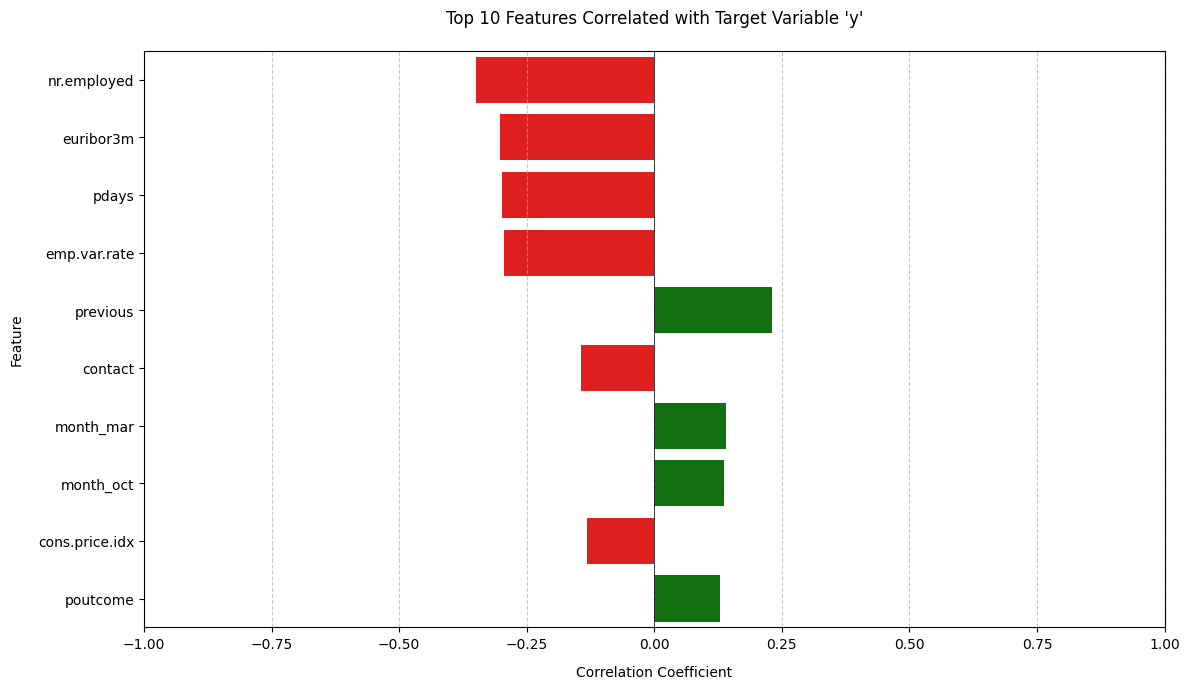

In [95]:
# Sort correlations by absolute value (excluding 'y' itself)
correlation_abs = correlation_matrix['y'].abs().sort_values(ascending=False)
top_features = correlation_abs.index[1:11]  # Exclude 'y' itself from top features

# Get correlation values with original signs
top_corr_values = correlation_matrix.loc[top_features, 'y']

# Create improved visualization
plt.figure(figsize=(12, 7))
barplot = sns.barplot(
    x=top_corr_values.values, 
    y=top_corr_values.index,
    palette=['red' if x < 0 else 'green' for x in top_corr_values.values]
)


plt.title("Top 10 Features Correlated with Target Variable 'y'", pad=20)
plt.xlabel("Correlation Coefficient", labelpad=10)
plt.ylabel("Feature", labelpad=10)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

## Visualizing correlations after preprocessing

The variable "previous" shows the strongest positive correlation with the target and "nr empolyed" the strongest negative correlation.

Nr empolyed, emp.var.rate, pdays and euribor3m have relatively strong negative correlations, which suggests that economic factors might influence subscription behavior.

In [96]:
#points += 8

### **Step 2: Training Three Classification Models** (8 points)


**Model Selection:** Choose three classification algorithms: Logistic Regression, Decision Tree, and K-nearest neighborhood (KNN). (0.5 grade units)

**Model Training:** ** Train each of the selected models on the training dataset. (4 points)

**Model Evaluation:** Evaluate the performance of each model on the testing dataset using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC). (4 points)

In [97]:
# Step 2: Training Three Classification Models


In [98]:
#points += 8

In [99]:
# Import libaries for score and model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import (
    precision_recall_curve, average_precision_score,
    roc_auc_score, classification_report,
    confusion_matrix, fbeta_score
)

In [102]:
# defining the models and their paramters
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

# dict for pipelines
pipelines = {}

# Store all results for final comparison
final_results = {}

for model_name, model in models.items():
    print(f"\n\033[1m==== {model_name} ====\033[0m")
    
    # metrics
    basic_pipe = Pipeline([('preprocessor', preprocessor), ('classifier', model)])
    basic_pipe.fit(X_train, y_train)
    # Get predictions (class + probabilities)
    y_pred = basic_pipe.predict(X_test)
    # Needed for ROC-AUC
    y_proba = basic_pipe.predict_proba(X_test)[:, 1]

    print("Evaluation Results:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred, target_names=['no', 'yes']))



==== LogisticRegression ====
Evaluation Results:
Accuracy: 0.9012
Precision: 0.6939
Recall: 0.2198
F1-score: 0.3339
ROC-AUC: 0.8007

==== DecisionTree ====
Evaluation Results:
Accuracy: 0.8426
Precision: 0.3168
Recall: 0.3438
F1-score: 0.3297
ROC-AUC: 0.6252

==== KNN ====
Evaluation Results:
Accuracy: 0.8937
Precision: 0.5528
Recall: 0.2931
F1-score: 0.3831
ROC-AUC: 0.7393


### **Step 3: Model Tuning and Validation (Including ROC Curve Analysis and Model Selection Rationale)** (8 points)


**Hyperparameter Tuning**: ** Perform hyperparameter tuning for each model to optimize their performance. You can use techniques like grid search or random search. (1 point)

**Cross-Validation:** Implement k-fold cross-validation to ensure that the models generalize well to new data. (1 point)

**ROC Curve Analysis:** For each model, calculate the ROC curve and the corresponding area under the ROC curve (AUC-ROC) as a performance metric. Plot the ROC curves for visual comparison. (1 point)

**Threshold Selection:** Determine the optimal threshold for classification by considering the ROC curve and choosing the point that balances sensitivity and specificity based on the problem's context (1 point) 

**Final Model Selection:** Select the best-performing model based on the AUC-ROC, cross-validation results, and other relevant evaluation metrics (e.g., accuracy, precision, recall, F1-score). (1 point)

**Model Testing:** ** Evaluate the selected model on a separate validation dataset (if available) or the testing dataset from Step 1. (1 point)

**Rationale for Model Selection:** In this section, provide a written explanation for why you chose the final model for testing. Discuss the key factors that influenced your decision, such as the AUC-ROC performance, cross-validation results, and any specific characteristics of the problem. Explain how the selected model aligns with the goals of the project and its potential practical applications. This step encourages critical thinking and demonstrates your understanding of the machine learning workflow. (2 points)

In [109]:
# Model Tuning and Validation
from sklearn.model_selection import GridSearchCV



# Parameter grids
param_grids = {
    'LogisticRegression': [
        { 
            'classifier__C': [0.8, 1.0, 1.2], 
            'classifier__solver': ['lbfgs', 'liblinear'],
            'classifier__max_iter': [500, 1000]
        },
        { 
            'classifier__C': [0.5, 1.0, 2.0],
            'classifier__class_weight': [None, 'balanced'],
            'classifier__max_iter': [500, 1000],
            'classifier__solver': ['lbfgs']
        }
    ],
    'DecisionTree': {
        'classifier__max_depth': [2, 3, 5, 7, 10, 15],
        'classifier__min_samples_split': [2, 5, 10, 20],
        'classifier__min_samples_leaf': [1, 2, 5],
        'classifier__criterion': ['gini', 'entropy', 'log_loss'],
        'classifier__max_features': ['sqrt', 'log2']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
        'classifier__p': [1, 2] 
    }
}

best_models = {}
for model_name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    gs = GridSearchCV(pipe, param_grids[model_name], 
                     scoring='roc_auc', cv=7, n_jobs=-1)
    gs.fit(X_train, y_train)
    best_models[model_name] = gs.best_estimator_
    print(f"{model_name} - Best AUC: {gs.best_score_:.4f}, Params: {gs.best_params_}")

LogisticRegression - Best AUC: 0.7905, Params: {'classifier__C': 0.5, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 500, 'classifier__solver': 'lbfgs'}
DecisionTree - Best AUC: 0.7765, Params: {'classifier__criterion': 'gini', 'classifier__max_depth': 7, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 10}
KNN - Best AUC: 0.7588, Params: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__p': 1, 'classifier__weights': 'uniform'}


<Figure size 1200x800 with 0 Axes>

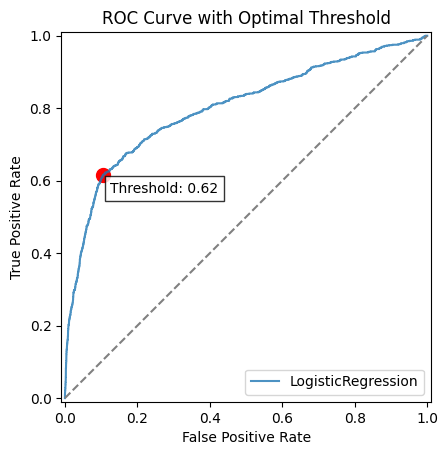

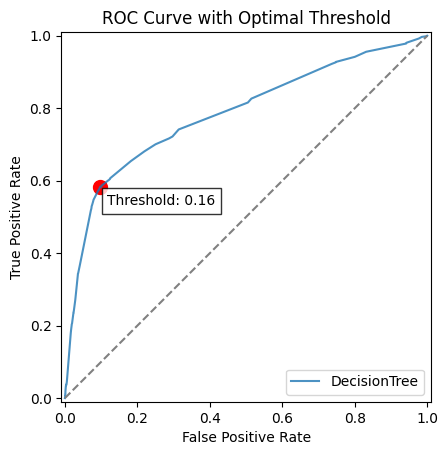

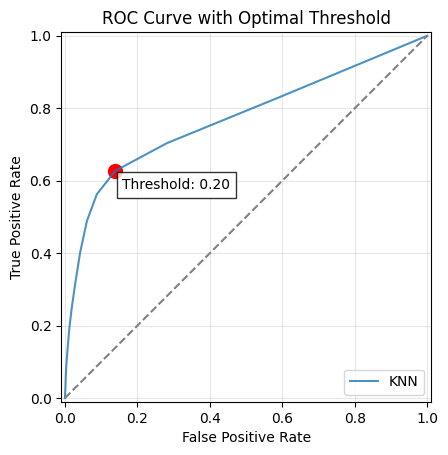

In [112]:
from sklearn.metrics import roc_curve, RocCurveDisplay

plt.figure(figsize=(12, 8))

for model_name, model in best_models.items():

    # Get probabilities and calculate ROC
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Plot ROC curve
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, 
                                 estimator_name=model_name)
    roc_display.plot(linestyle='-', alpha=0.8)
    
    # Find and mark optimal threshold (using Youdens J sstatistic)
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_threshold = thresholds[optimal_idx]
    
    # Annotate the optimal point
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], 
               marker='o', color='red', s=100)
    plt.text(fpr[optimal_idx]+0.02, tpr[optimal_idx]-0.05, 
            f'Threshold: {optimal_threshold:.2f}',
            fontsize=10, bbox=dict(facecolor='white', alpha=0.8))
    plt.title('ROC Curve with Optimal Threshold')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')


plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [114]:
# Threshold Selection 
from sklearn.metrics import roc_curve

# Dictionary to store optimal thresholds
optimal_thresholds = {}

# calculating the same thresholds as above but saving them thhis time
for model_name, model in best_models.items():
    # Get predicted probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    
    # Find optimal threshold (using Youdens J sstatistic)
    j_scores = tpr - fpr
    optimal_idx = np.argmax(j_scores)
    optimal_thresholds[model_name] = thresholds[optimal_idx]
    
    print(f"{model_name} optimal threshold: {optimal_thresholds[model_name]:.4f}")
    
final_results = {}
for model_name, model in best_models.items():
    print(f"\n\033[1m==== {model_name} (Optimal Threshold) ====\033[0m")
    
    # Get probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Apply optimal threshold
    y_pred_optimal = (y_proba >= optimal_thresholds[model_name]).astype(int)
    
    # Evaluate
    print(f"Threshold used: {optimal_thresholds[model_name]:.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred_optimal):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred_optimal):.4f}")
    print(f"F1-score: {f1_score(y_test, y_pred_optimal):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    #print("\nClassification Report:")
    #print(classification_report(y_test, y_pred_optimal, target_names=['no', 'yes']))
    
    # Store results
    final_results[model_name] = {
        'threshold': optimal_thresholds[model_name],
        'accuracy': accuracy_score(y_test, y_pred_optimal),
        'precision': precision_score(y_test, y_pred_optimal),
        'recall': recall_score(y_test, y_pred_optimal),
        'f1': f1_score(y_test, y_pred_optimal),
        'roc_auc': roc_auc_score(y_test, y_proba)
    }
print("\n\033[1m=== Comparison with Default Threshold (0.5) ===\033[0m")
for model_name in best_models:
    y_proba = best_models[model_name].predict_proba(X_test)[:, 1]
    y_pred_default = (y_proba >= 0.5).astype(int)
    
    print(f"\n{model_name}:")
    print(f"Default Threshold Recall: {recall_score(y_test, y_pred_default):.4f}")
    print(f"Optimal Threshold Recall: {final_results[model_name]['recall']:.4f}")
    print(f"Improvement: {final_results[model_name]['recall'] - recall_score(y_test, y_pred_default):+.4f}")

LogisticRegression optimal threshold: 0.6224
DecisionTree optimal threshold: 0.1575
KNN optimal threshold: 0.2000

==== LogisticRegression (Optimal Threshold) ====
Threshold used: 0.6224
Accuracy: 0.8633
Precision: 0.4262
Recall: 0.6164
F1-score: 0.5040
ROC-AUC: 0.8005

==== DecisionTree (Optimal Threshold) ====
Threshold used: 0.1575
Accuracy: 0.8668
Precision: 0.4325
Recall: 0.5830
F1-score: 0.4966
ROC-AUC: 0.7844

==== KNN (Optimal Threshold) ====
Threshold used: 0.2000
Accuracy: 0.8348
Precision: 0.3644
Recall: 0.6272
F1-score: 0.4610
ROC-AUC: 0.7698

=== Comparison with Default Threshold (0.5) ===

LogisticRegression:
Default Threshold Recall: 0.6433
Optimal Threshold Recall: 0.6164
Improvement: -0.0269

DecisionTree:
Default Threshold Recall: 0.2037
Optimal Threshold Recall: 0.5830
Improvement: +0.3793

KNN:
Default Threshold Recall: 0.2468
Optimal Threshold Recall: 0.6272
Improvement: +0.3804


# Final Model Selection (Select the best-performing model based on AUC-ROC)
The best model based on AUC-ROC and other metrics is the LogisticRegression

In [117]:
# Model Testing (Evaluate the selected model on the testing dataset)
print(f"\n\033[1m==== LogisticRegression (Optimal Threshold) ====\033[0m")
    
# Get probabilities
y_proba = model.predict_proba(X_test)[:, 1]
    
# Apply optimal threshold
y_pred_optimal = (y_proba >= optimal_thresholds["LogisticRegression"]).astype(int)
    
# Evaluate
print(f"Threshold used: {optimal_thresholds["LogisticRegression"]:.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_optimal):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_optimal):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_optimal):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
print("\nClassification Report:")
print(classification_report(y_test, y_pred_optimal, target_names=['no', 'yes']))
    
# Store results
final_results[model_name] = {
    'threshold': optimal_thresholds["LogisticRegression"],
    'accuracy': accuracy_score(y_test, y_pred_optimal),
    'precision': precision_score(y_test, y_pred_optimal),
    'recall': recall_score(y_test, y_pred_optimal),
    'f1': f1_score(y_test, y_pred_optimal),
    'roc_auc': roc_auc_score(y_test, y_proba)
}


==== LogisticRegression (Optimal Threshold) ====
Threshold used: 0.6224
Accuracy: 0.8960
Precision: 0.7006
Recall: 0.1336
F1-score: 0.2244
ROC-AUC: 0.7698

Classification Report:
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7310
         yes       0.70      0.13      0.22       928

    accuracy                           0.90      8238
   macro avg       0.80      0.56      0.58      8238
weighted avg       0.88      0.90      0.86      8238



In [118]:
# Rationale for Model Selection: 
# In this section, provide a written explanation for why you chose the final model for testing.
# Discuss the key factors that influenced your decision, such as the AUC-ROC performance, cross-validation results,
# and any specific characteristics of the problem. Explain how the selected model aligns with the goals of the project
# and its potential practical applications. This step encourages critical thinking and demonstrates your understanding of the machine learning workflow.

In [119]:
#grade += 8

### Additional Challenges (Optional):

To make the project more challenging, you can introduce the following tasks and collect 5 extra points for the project:

1. Implement an ensemble method (e.g., Neural Network or Random Forest) and compare its performance with the individual models.

2. Deal with class imbalance in the target variable.

3. Explore feature engineering to create new features that might improve model performance.

2.

      Used stratified split by Y, when splitting data into train and test sets. Preserving the targets balance.

      Then used SMOTE to deal with the imbalance

3.

       Did feature engineering on the pdays column. Transforming it into bins to enrich the data

# Metrics for SMOTE(additional challenge)

# Handling Class Imbalance

During the exploratory data analysis, we observed a significant class imbalance in the target variable y, where only ~11% of the clients subscribed to a term deposit.

Since the goal of this project is to develop a model that can accurately identify potential subscribers for targeted marketing, it is essential to ensure that the model does not ignore the minority class.

To address this, we applied SMOTE (Synthetic Minority Over-sampling Technique) with a sampling_strategy=0.5. This increased the number of samples in the minority class so that it became 50% the size of the majority class.

Its applied only to the training set to avoid data leakage and preserve the integrity of model evaluation.


In [120]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline  
# Special pipeline for SMOTE

# Create the final pipeline with SMOTE
full_pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(
    sampling_strategy=0.5,  # Resample minority to 50% of majority
    k_neighbors=4,
    random_state=42
))
])

# fit and transform training data
X_train_processed, y_train_resampled = full_pipeline.fit_resample(X_train, y_train)

# Apply SMOTE and check counts
print("Before SMOTE:", np.unique(y_train, return_counts=True))
print("After SMOTE:", np.unique(y_train_resampled, return_counts=True))

Before SMOTE: (array([0, 1]), array([29238,  3712]))
After SMOTE: (array([0, 1]), array([29238, 14619]))


In [121]:
for model_name, model in models.items():
    print(f"\n\033[1m==== {model_name} ====\033[0m")
    # SMOTE metrics (Additional challenge)
    smote_pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(sampling_strategy=0.5, k_neighbors=4, random_state=42)),
        ('classifier', model)
    ])
    smote_pipe.fit(X_train, y_train)
    
    print("\nSMOTE Results:")
    print(f"ROC AUC: {roc_auc_score(y_test, smote_pipe.predict_proba(X_test)[:, 1]):.4f}")
    print(f"Avg Precision: {average_precision_score(y_test, smote_pipe.predict_proba(X_test)[:, 1]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, smote_pipe.predict(X_test), target_names=['no', 'yes']))


==== LogisticRegression ====

SMOTE Results:
ROC AUC: 0.7997
Avg Precision: 0.4627

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.91      0.93      7310
         yes       0.46      0.57      0.51       928

    accuracy                           0.88      8238
   macro avg       0.70      0.74      0.72      8238
weighted avg       0.89      0.88      0.88      8238


==== DecisionTree ====

SMOTE Results:
ROC AUC: 0.6341
Avg Precision: 0.1922

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.91      0.91      7310
         yes       0.33      0.35      0.34       928

    accuracy                           0.85      8238
   macro avg       0.62      0.63      0.63      8238
weighted avg       0.85      0.85      0.85      8238


==== KNN ====

SMOTE Results:
ROC AUC: 0.7374
Avg Precision: 0.2836

Classification Report:
              precision    recall  f1-score

In [123]:
smote_params = {
    'LogisticRegression': [
        {  # SMOTE-optimized configurations
            'smote__k_neighbors': [3, 5],              # Control synthetic sample quality
            'smote__sampling_strategy': [0.5, 0.7],    # Minority class ratio
            'classifier__C': [0.5, 1.0, 1.5],
            'classifier__max_iter': [500, 1000],
            'classifier__class_weight': ['balanced']    # Crucial for SMOTE
        },
        {  # ElasticNet options
            'smote__k_neighbors': [3],
            'classifier__penalty': ['elasticnet'],
            'classifier__solver': ['saga'],
            'classifier__max_iter': [500, 1000],
            'classifier__l1_ratio': [0.3, 0.5]
        }
    ],
    'DecisionTree': {
        'smote__k_neighbors': [3, 5],
        'smote__sampling_strategy': [0.5],
        'classifier__max_depth': [5, 7],               # Shallower trees often better
        'classifier__min_samples_leaf': [1, 2]         # Default: 1
    },
    'KNN': {
        'smote__k_neighbors': [3, 5],
        'classifier__n_neighbors': [5, 7],             # Higher K for stability
        'classifier__weights': ['distance']            # Always use with SMOTE
    }
}


In [125]:
best_smote = {}
for model_name, model in models.items():
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    
    gs = GridSearchCV(pipe, smote_params[model_name], 
                     scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)
    gs.fit(X_train, y_train)
    best_smote[model_name] = gs.best_estimator_
    print(f"\nSMOTE {model_name} - Best ROCAUC: {gs.best_score_:.4f}")
    print(f"Avg Precision: {average_precision_score(y_test, gs.predict_proba(X_test)[:, 1]):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, gs.predict(X_test), target_names=['no', 'yes']))
    print("Best params:", gs.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits

SMOTE LogisticRegression - Best ROCAUC: 0.7884
Avg Precision: 0.4608

Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.85      0.90      7310
         yes       0.36      0.65      0.46       928

    accuracy                           0.83      8238
   macro avg       0.65      0.75      0.68      8238
weighted avg       0.88      0.83      0.85      8238

Best params: {'classifier__C': 0.5, 'classifier__class_weight': 'balanced', 'classifier__max_iter': 500, 'smote__k_neighbors': 5, 'smote__sampling_strategy': 0.5}
Fitting 5 folds for each of 8 candidates, totalling 40 fits

SMOTE DecisionTree - Best ROCAUC: 0.7688
Avg Precision: 0.4155

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.93      0.93      7310
         yes       0.49      0.54      0.51       928

    accuracy                           0.8

In [ ]:
#grade += 5

### Good Luck!

## Peer evaluation (5 points)
Each team member can gain max 5 points based on peer review
- Peer review is done separately in ITS